In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

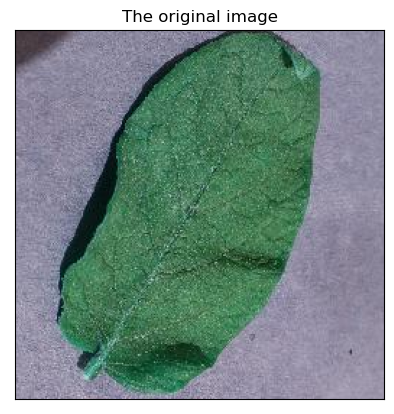

In [2]:
ref = cv2.imread(r"C:\Users\DELL\Desktop\Veg-dataset\Veg-dataset\test_set\Potato___healthy\f0fdde26-78b4-46f0-9eb8-7c2a743d34aa___RS_HL 4165.JPG")
plt.imshow(ref), plt.grid(False)

plt.title('The original image')
plt.xticks([])
plt.yticks([])
plt.show()

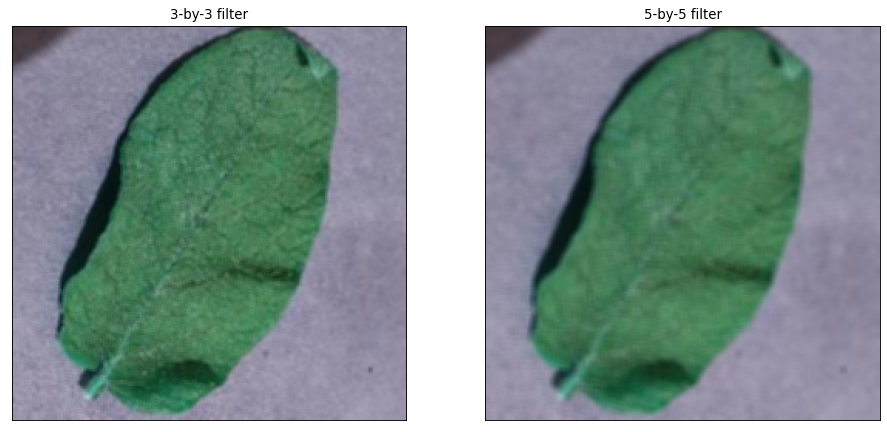

In [3]:
kernel_5 = np.ones((5,5),np.float32)/25
kernel_3 = np.ones((3,3),np.float32)/9

filtered_5 = cv2.filter2D(ref,-1,kernel_5)
filtered_3 = cv2.filter2D(ref,-1,kernel_3)

fig=plt.figure(figsize=(14, 14), dpi= 80, facecolor='w', edgecolor='k')

plt.subplot(121), plt.imshow(filtered_3), plt.title('3-by-3 filter')
plt.grid(False)
plt.xticks([])
plt.yticks([])

plt.subplot(122), plt.imshow(filtered_5), plt.title('5-by-5 filter')
plt.grid(False)
plt.xticks([])
plt.yticks([])

plt.show()

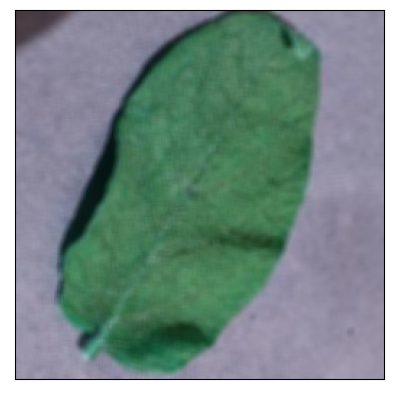

(<matplotlib.image.AxesImage at 0x17295178b50>, None, ([], []), ([], []), None)

In [4]:
blurred = cv2.blur(ref, (5, 5), -1)

plt.imshow(blurred), plt.grid(False), plt.xticks([]), plt.yticks([]), plt.show()

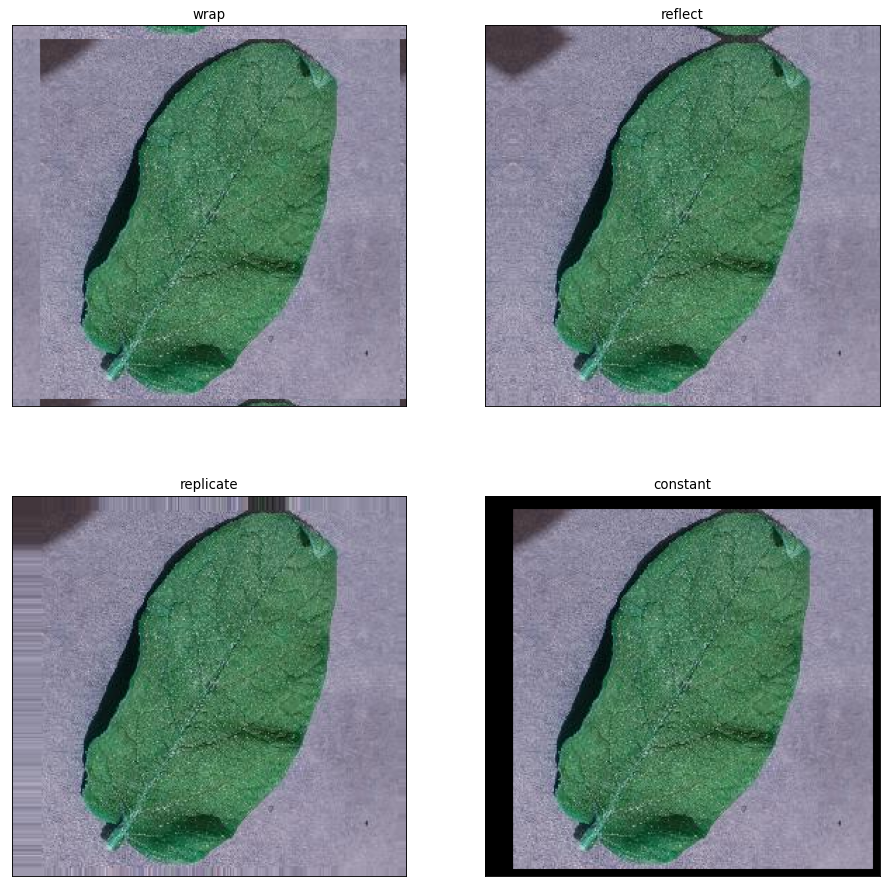

In [5]:
top = 10; bottom = 5; left = 20; right = 5
const = 100
img2 = cv2.copyMakeBorder(ref, top, bottom, left, right, 
                          cv2.BORDER_WRAP)
img3 = cv2.copyMakeBorder(ref, top, bottom, left, right, 
                          cv2.BORDER_REFLECT)
img4 = cv2.copyMakeBorder(ref, top, bottom, left, right, 
                          cv2.BORDER_REPLICATE)
img5 = cv2.copyMakeBorder(ref, top, bottom, left, right, 
                          cv2.BORDER_CONSTANT, const)

# Display the images
fig=plt.figure(figsize=(14, 14), dpi= 80, facecolor='w', edgecolor='k')

plt.subplot(221), plt.imshow(img2), plt.grid(False)
plt.xticks([]), plt.yticks([]), plt.title('wrap')

plt.subplot(222), plt.imshow(img3), plt.grid(False)
plt.xticks([]), plt.yticks([]), plt.title('reflect')

plt.subplot(223), plt.imshow(img4), plt.grid(False)
plt.xticks([]), plt.yticks([]), plt.title('replicate')

plt.subplot(224), plt.imshow(img5), plt.grid(False)
plt.xticks([]), plt.yticks([]), plt.title('constant')

plt.show()

(([], []), ([], []))

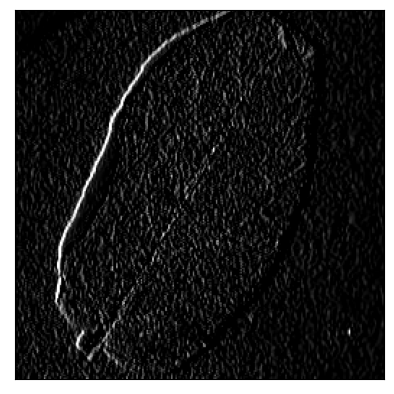

In [6]:
vertical_gd = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]])

filter_v = cv2.filter2D(ref[:, :, 2], -1, vertical_gd)

plt.imshow(filter_v, cmap='gray'), plt.grid(False)
plt.xticks([]), plt.yticks([])

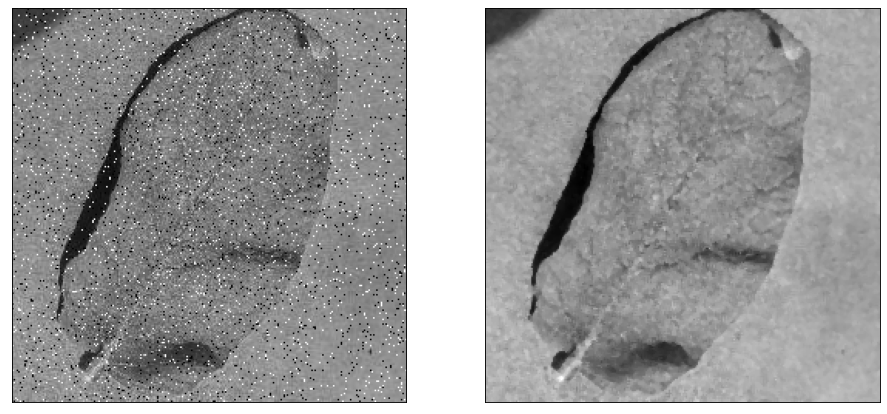

In [7]:
s_and_p = np.random.rand(ref.shape[0], ref.shape[1])

salt = s_and_p > .975
pepper = s_and_p < .025

channel_2 = np.atleast_1d(ref[:, :, 1])
noisy = np.zeros_like(channel_2)

for i in range(channel_2.shape[0]*channel_2.shape[1]):
  if salt.ravel()[i] == 1:
    noisy.ravel()[i] = 255
  elif pepper.ravel()[i] == 1:
    noisy.ravel()[i] = 0
  else:
    noisy.ravel()[i] = channel_2.ravel()[i]
    
Med = cv2.medianBlur(noisy, 3)

fig=plt.figure(figsize=(14, 14), dpi= 80, facecolor='w', edgecolor='k')
plt.subplot(121), plt.xticks([]), plt.yticks([])
plt.imshow(noisy, cmap='gray'), plt.grid(False)
plt.subplot(122), plt.xticks([]), plt.yticks([])
plt.imshow(Med, cmap='gray'), plt.grid(False)
plt.show()
    

(<matplotlib.image.AxesImage at 0x172957176a0>, None)

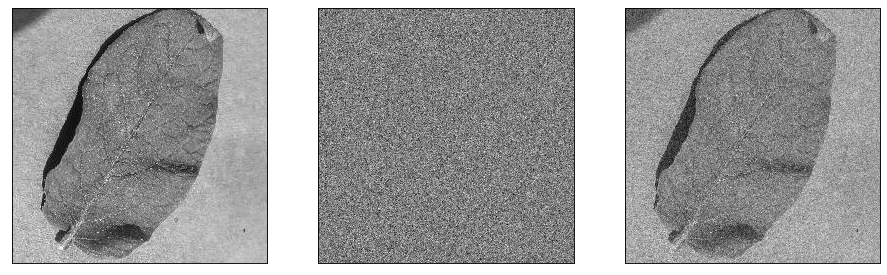

In [8]:
mean = 0
sigma = 20.0
gauss_noise = np.random.normal(mean, sigma, (ref.shape[0], ref.shape[1]))

gray = cv2.cvtColor(ref, cv2.COLOR_BGR2GRAY)

g_noisy = gray + gauss_noise

fig=plt.figure(figsize=(14, 14), dpi= 80, facecolor='w', edgecolor='k')
plt.subplot(131), plt.xticks([]), plt.yticks([])
plt.imshow(gray, cmap='gray'), plt.grid(False)
plt.subplot(132), plt.xticks([]), plt.yticks([])
plt.imshow(gauss_noise, cmap='gray'), plt.grid(False)
plt.subplot(133), plt.xticks([]), plt.yticks([])
plt.imshow(g_noisy, cmap='gray'), plt.grid(False)

(([], []), ([], []))

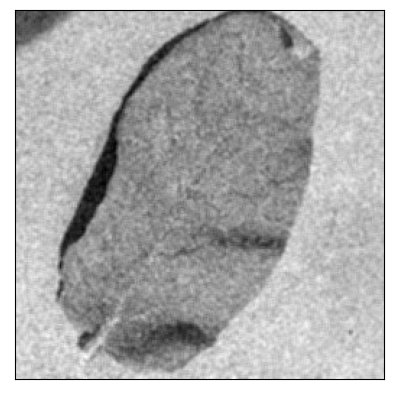

In [9]:
g_filtered = cv2.GaussianBlur(g_noisy, (3, 3), 20, 20)

plt.imshow(g_filtered, cmap='gray'), plt.grid(False)
plt.xticks([]), plt.yticks([])

[[0.33319442]
 [0.33361117]
 [0.33319442]]


(<matplotlib.image.AxesImage at 0x17295986fa0>, None)

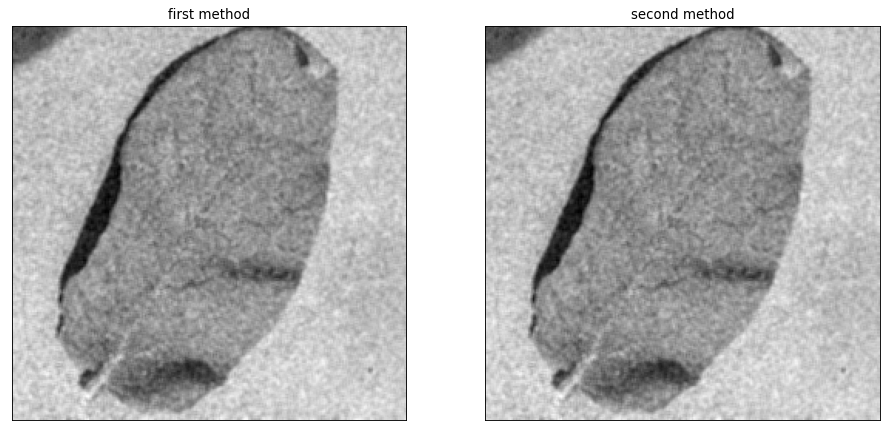

In [10]:
g_kernel = cv2.getGaussianKernel(3, 20)
print(g_kernel)

g_filtered_2 = cv2.sepFilter2D(g_noisy, -1, g_kernel, g_kernel)

fig=plt.figure(figsize=(14, 14), dpi= 80, facecolor='w', edgecolor='k')
plt.subplot(121), plt.xticks([]), plt.yticks([]), plt.title('first method')
plt.imshow(g_filtered, cmap='gray'), plt.grid(False)
plt.subplot(122), plt.xticks([]), plt.yticks([]), plt.title('second method')
plt.imshow(g_filtered_2, cmap='gray'), plt.grid(False)